In [1]:
import timm

In [11]:
timm.list_models("vit")

['vit_base_patch8_224',
 'vit_base_patch14_dinov2',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_384',
 'vit_base_patch16_clip_224',
 'vit_base_patch16_clip_384',
 'vit_base_patch16_gap_224',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_rpn_224',
 'vit_base_patch16_xp_224',
 'vit_base_patch32_224',
 'vit_base_patch32_384',
 'vit_base_patch32_clip_224',
 'vit_base_patch32_clip_384',
 'vit_base_patch32_clip_448',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_giant_patch14_clip_224',
 'vit_giant_patch14_dinov2',
 'vit_gigantic_patch14_224',
 'vit_gigantic_patch14_clip_224',
 'vit_gigantic_patch16_224_ijepa',
 'vit_huge_patch14_224',
 'vit_huge_patch14_224_ijepa',
 'vit_huge_patch14_clip_224',
 'vit_huge_patch14_clip_336',
 'vit_huge_patch14_xp_224',
 'vit_huge_patch16_448_ijepa',
 'vi

In [16]:
timm.get_pretrained_cfg("vit_base_patch16_224.augreg_in21k")

PretrainedCfg(url='https://storage.googleapis.com/vit_models/augreg/B_16-i21k-300ep-lr_0.001-aug_medium1-wd_0.1-do_0.0-sd_0.0.npz', file=None, state_dict=None, hf_hub_id='timm/vit_base_patch16_224.augreg_in21k', hf_hub_filename=None, source=None, architecture='vit_base_patch16_224', tag='augreg_in21k', custom_load=True, input_size=(3, 224, 224), test_input_size=None, min_input_size=None, fixed_input_size=True, interpolation='bicubic', crop_pct=0.9, test_crop_pct=None, crop_mode='center', mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), num_classes=21843, label_offset=None, label_names=None, label_descriptions=None, pool_size=None, test_pool_size=None, first_conv='patch_embed.proj', classifier='head', license=None, description=None, origin_url=None, paper_name=None, paper_ids=None, notes=None)

In [17]:
timm.list_pretrained("vit_base_patch16_224")

['vit_base_patch16_224.augreg2_in21k_ft_in1k',
 'vit_base_patch16_224.augreg_in1k',
 'vit_base_patch16_224.augreg_in21k',
 'vit_base_patch16_224.augreg_in21k_ft_in1k',
 'vit_base_patch16_224.dino',
 'vit_base_patch16_224.mae',
 'vit_base_patch16_224.orig_in21k_ft_in1k',
 'vit_base_patch16_224.sam_in1k']

In [2]:
model = timm.create_model("vit_base_patch16_224.augreg_in21k",pretrained=True)

In [3]:
from data_processing import open_data

In [6]:
dataset = open_data("train",224,224)

In [3]:
for data,label in dataset:
    print(int(label),end="")

100101000011100000101001000000000010010100000100000000010101010011100010000010100010101010011011100000101000111110110100101100011001000000011001000011000010100110010001000010000001001000010010110110000000100000000011011110101010010001000000000010010000110001010111100000010000000111000001001001110100100000011010000100000000100001100100010101111100010000010000000011100000110000000000000000000000010100011011001000000101000101010101100000010100001100010011111000000101100000001110100100000101011100010000100100101011010010101000000011010011100

In [39]:
import torchvision.transforms as T
from data_processing import TreeSubset
from torch.utils.data import DataLoader
i = 0
total_size = len(dataset)
fraction = 1/5
seg = int(total_size * fraction)
trll = 0
trlr = i * seg
vall = trlr
valr = i * seg + seg
trrl = valr
trrr = total_size
train_left_indices = list(range(trll,trlr))
train_right_indices = list(range(trrl,trrr))
train_transform = T.Compose([
        T.RandomHorizontalFlip(),
        T.RandomResizedCrop((584, 335),scale = (0.875,1)),
        #T.RandAugment(num_ops=2, magnitude=9),
        T.ToTensor()
    ])
val_transform = T.Compose([
        T.ToTensor()
])
train_indices = train_left_indices + train_right_indices
val_indices = list(range(vall,valr))
train_set = TreeSubset(dataset,train_indices,train_transform)
val_set = TreeSubset(dataset,val_indices,val_transform)

In [40]:
train_loader = DataLoader(train_set, batch_size=1, shuffle=False, num_workers=0)
val_loader = DataLoader(val_set, batch_size=1, shuffle=False, num_workers=0)

In [1]:
from main import main_loadmodel

In [2]:
summary, conf = main_loadmodel()

100%|██████████| 28/28 [00:11<00:00,  2.39it/s]

test set evaluate, loss: 0.3619, accuracy: 0.8571


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conf = np.array([[85,  7],[13, 32]])

In [3]:
import seaborn as sn

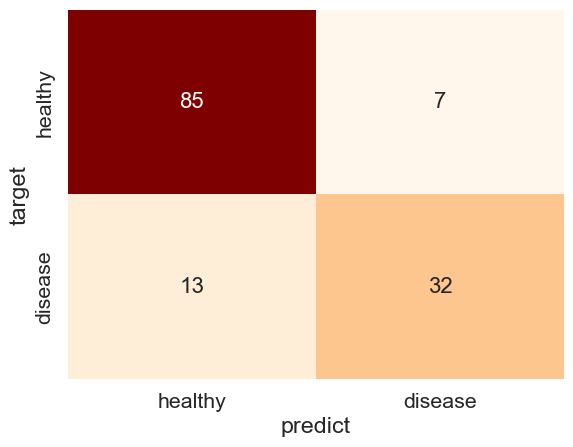

In [6]:
sn.set(font_scale=1.4)
sn.heatmap(conf,annot=True,annot_kws={"size":16}, cmap="OrRd", cbar=False, xticklabels=["healthy","disease"], yticklabels=["healthy","disease"])
plt.xlabel("predict")
plt.ylabel("target")
plt.show()